# 전자제조데이터분석 과제 03
## 제출: eclass 과제메뉴 03
- Introduction to Pandas-Part III의 내용 중,
"Example: Visualizing Seattle Bicycle Counts" 섹션의 코드 블럭들을 실행하고,  
각 코드 블럭의 의도와 동작 방식들에 대하여 간략히 분석 후 해당 내용을 코멘트하여 제출하세요.  
- 아래 두 가지 방법 중 한 가지를 선택해서 진행하세요.  
1) 코드 옆에 주석 처리 (#...)를 통하여 진행  
2) 텍스트 블럭을 별도로 추가하여 분석 내용 기술  
- plot 관련 코드들은 SKip!  
- 제출 시, "Example: Visualizing Seattle Bicycle Counts" 섹션 외의 다른 섹션들은 삭제 후 제출하세요.  

##기한: 2021.11.13 23:59

학번: 21510004
이름: 이예빈

## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

In [ ]:
# 데이터 다운로드
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4496k    0 4496k    0     0  1085k      0 --:--:--  0:00:04 --:--:-- 1088k


Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [ ]:
# pandas 라이브러리 임포트
import pandas as pd

In [ ]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True) # csv 형식으로 저장된 데이터 불러오기, 날짜 컬럼을 인덱스로 사용(parse_dates 옵션을 True로 지정해주었기 때문에 날짜를 datetime 형태로 변환)
data.head() # 상위 5개의 데이터 확인

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


For convenience, we'll further process this dataset by shortening the column names and adding a "Total" column:

In [ ]:
# 쉬운 사용을 위해 컬럼 이름 간단히 변경
data.columns = ['Total', 'East', 'West']

Now let's take a look at the summary statistics for this data:

In [ ]:
# 결측치 제거하고 데이터 통계량 요약
data.dropna().describe()

,Total,East,West
count,144352.000000,144352.000000,144352.000000
mean,111.188013,50.529241,60.658772
std,141.260941,65.050403,87.812023
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,146.000000,68.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [ ]:
# 시각화를 위한 라이브러리 임포트
import matplotlib.pyplot as plt

In [ ]:
# matplotlib를 기반으로 하는 시각화 라이브러리 seaborn 사용
%matplotlib inline
import seaborn; seaborn.set()

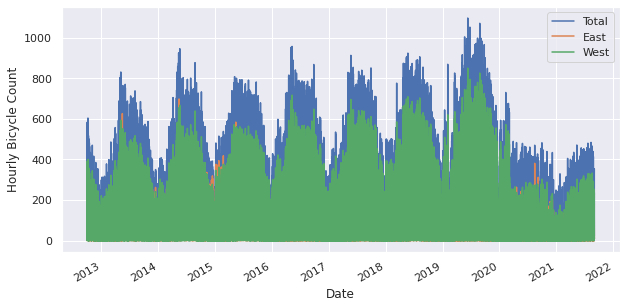

In [ ]:
data.plot(figsize = (10,5)) # 데이터 시각화 - 기본 설정으로 찍어보기 +) 보다 잘 보기 위해서 원래 코드와 다르게 그래프 크기 설정
plt.ylabel('Hourly Bicycle Count'); # y축 레이블을 'Hourly Bicycle Count'로 설정

The ~150K hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week:

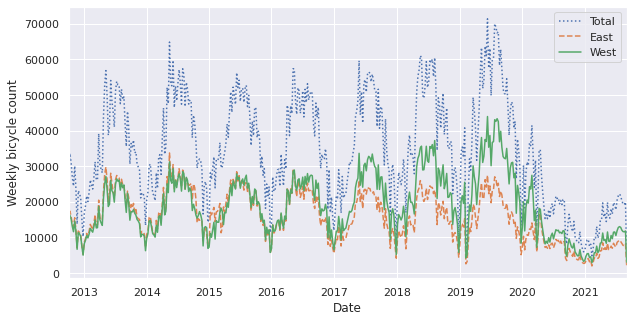

In [ ]:
weekly = data.resample('W').sum() # 데이터를 주(Weekly) 단위로 리샘플링, 구간마다 총합을 대표값으로 사용
weekly.plot(style=[':', '--', '-'], # Total, East, West 순서대로 :, --, - 로 표현
            figsize = (10,5)); # +) 보다 잘 보기 위해서 원래 코드와 다르게 그래프 크기 설정
plt.ylabel('Weekly bicycle count'); # y축 레이블을 'Weekly Bicycle Count'로 설정

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather;).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

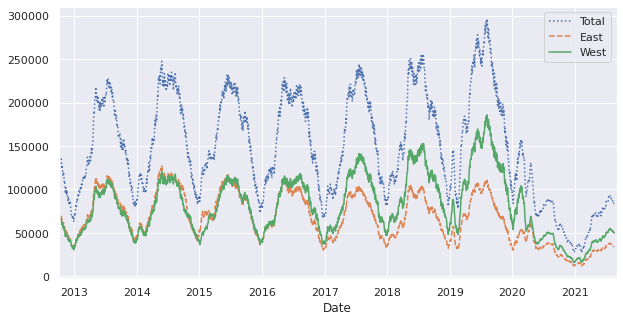

In [ ]:
daily = data.resample('D').sum() # 데이터를 일(Daily) 단위로 리샘플링, 구간마다 총합을 대표값으로 사용
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'], # 중간을 기준으로 30일 씩 총합을 내서 사용 (Total, East, West 순서대로 :, --, - 로 표현)
                                          figsize = (10,5)); # +) 보다 잘 보기 위해서 원래 코드와 다르게 그래프 크기 설정

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 30 days) and the width of the Gaussian within the window (we chose 10 days):

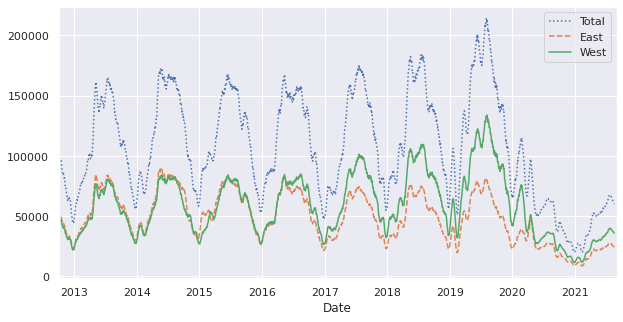

In [ ]:
daily.rolling(30, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'], # 중간을 기준으로 30일 씩 총합을 내서 사용, 표준편차가 10인 gaussian 분포를 따르는 윈도우 사용 (Total, East, West 순서대로 :, --, - 로 표현)
              figsize = (10,5)); # +) 보다 잘 보기 위해서 원래 코드와 다르게 그래프 크기 설정               

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in Aggregation and Grouping section:

In [ ]:
# numpy 라이브러리 임포트 
import numpy as np

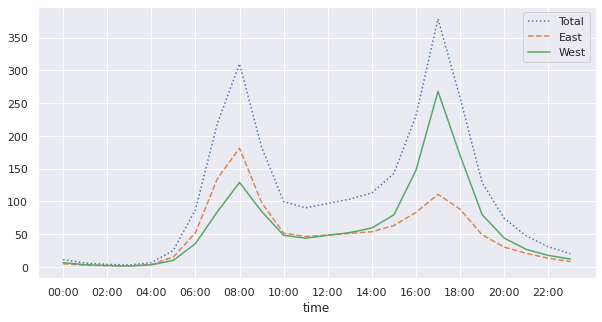

In [ ]:
by_time = data.groupby(data.index.time).mean() # 각 시간대 별로 평균치를 구함
hourly_ticks = 2 * 60 * 60 * np.arange(12) # 두 시간을 간격으로 x축 범위 설정
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], # 두 시간마다 평균 자전거 수량을 표현 (Total, East, West 순서대로 :, --, - 로 표현)
             figsize = (10,5));  # +) 보다 잘 보기 위해서 원래 코드와 다르게 그래프 크기 설정

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

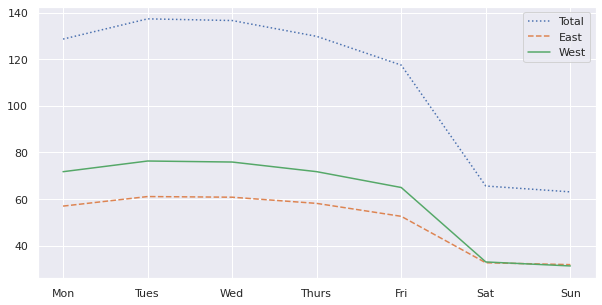

In [ ]:
by_weekday = data.groupby(data.index.dayofweek).mean() # 각 요일 별로 평균치를 구함
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'] # 각 요일을 x축의 범위로 설정
by_weekday.plot(style=[':', '--', '-'], # 요일 별 평균 자전거 수량을 표현 (Total, East, West 순서대로 :, --, - 로 표현)
                figsize = (10,5)); # +) 보다 잘 보기 위해서 원래 코드와 다르게 그래프 크기 설정

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [ ]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend') # 평일과 주말의 차이를 보기 위해 요일 인덱스가 5보다 작은 경우(평일) 'Weekday'로 아닌 경우(주말) 'Weekend'로 지정
by_time = data.groupby([weekend, data.index.time]).mean() # 평일과 주말을 기준으로 각 시간대 별 평균치를 구함

Now we'll use some of the Matplotlib tools to plot two panels side by side:

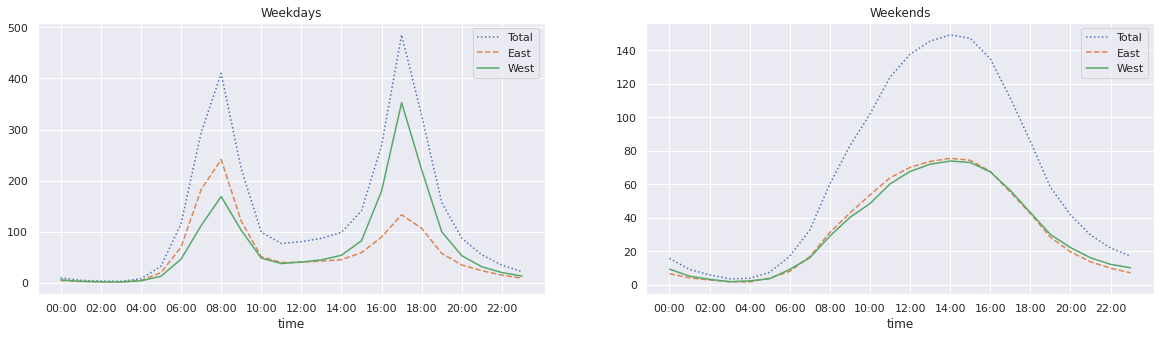

In [ ]:
# import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 5)) # 2개 그래프 동시에 그리기, 보다 잘 보기 위해서 원래 코드와 다르게 그래프 크기는 (20, 5)로 설정
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'],)  # 평일의 각 시간대 별 평균치를 첫번째 그래프로 표현, 그래프 제목은 'Weekdays' (Total, East, West 순서대로 :, --, - 로 표현)
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']); # 주말의 각 시간대 별 평균치를 두번째 그래프로 표현, 그래프 제목은 'Weekends' (Total, East, West 순서대로 :, --, - 로 표현)

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.